In [ ]:
import pandas as pd
from FederatedDataset.PartitionTypes.non_iid_partition_with_sensitive_feature import (
    NonIIDPartitionWithSensitiveFeature,
)
import torch
from collections import Counter
import matplotlib.pyplot as plt


In [ ]:
train_dataset = pd.read_csv("../data/celeba/train_original.csv")

In [ ]:
train_dataset.head()

In [ ]:
labels = [0 if item == -1 else item for item in train_dataset["Smiling"]]
sensitive_features = [0 if item == -1 else item for item in train_dataset["Male"]]


In [ ]:
(
    partitions_index,
    partitions_labels,
    partitions_index_list,
    dir_distributions,
) = NonIIDPartitionWithSensitiveFeature.do_partitioning_with_dataset_list(
    num_partitions=100,
    total_num_classes=2,
    labels=labels,
    sensitive_features=sensitive_features,
    alpha=5,
)


In [ ]:
new_partitions_index = {}

for node_name, indexes in partitions_index.items():
    for index in indexes:
        if node_name not in new_partitions_index:
            new_partitions_index[node_name] = []
        new_partitions_index[node_name].append(index.item())


In [ ]:
counter_partition = []
for node_name, indexes in new_partitions_index.items():
    label = torch.tensor(labels)[indexes]
    sensitive_feature = torch.tensor(sensitive_features)[indexes]
    counter_ = []
    for l, s in zip(label, sensitive_feature):
        counter_.append((l.item(), s.item()))
    counter_partition.append(Counter(counter_))


# Plots

In [ ]:
combinations = list(counter_partition[0].keys())
combinations


Mean of combination (0, 1): 405.65
Standard deviation of combination (0, 1): 139.3312150955413
Mean of combination (0, 0): 435.06
Standard deviation of combination (0, 0): 143.36239534829207
Mean of combination (1, 0): 513.1
Standard deviation of combination (1, 0): 171.09538275476635
Mean of combination (1, 1): 270.36
Standard deviation of combination (1, 1): 93.39491634987421


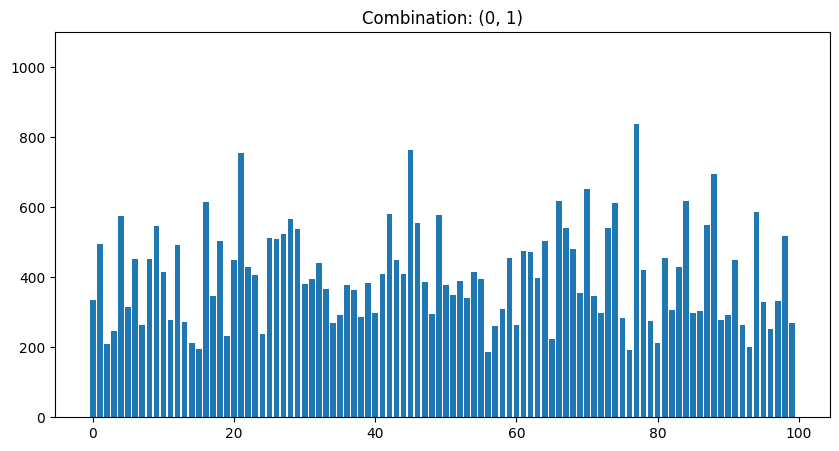

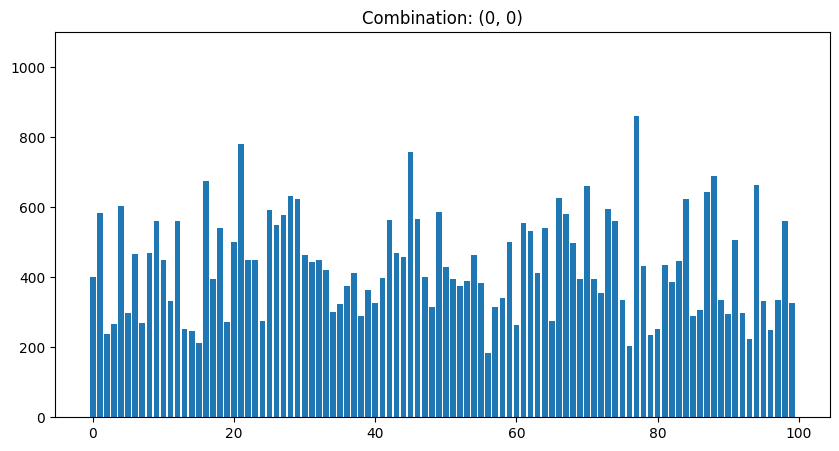

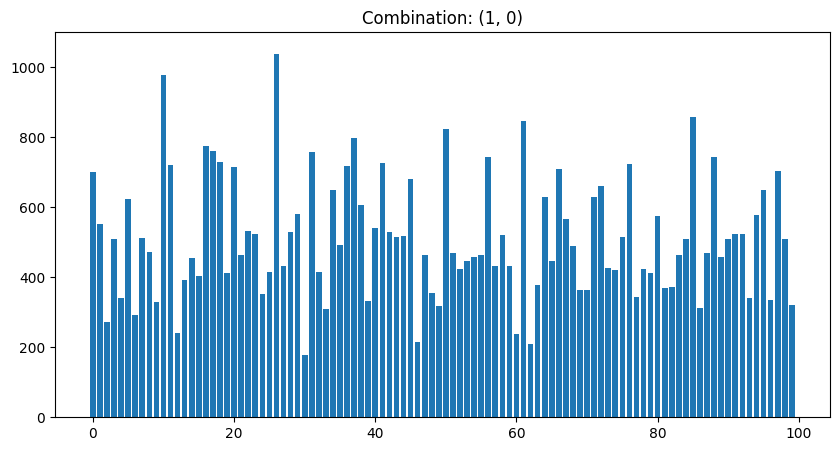

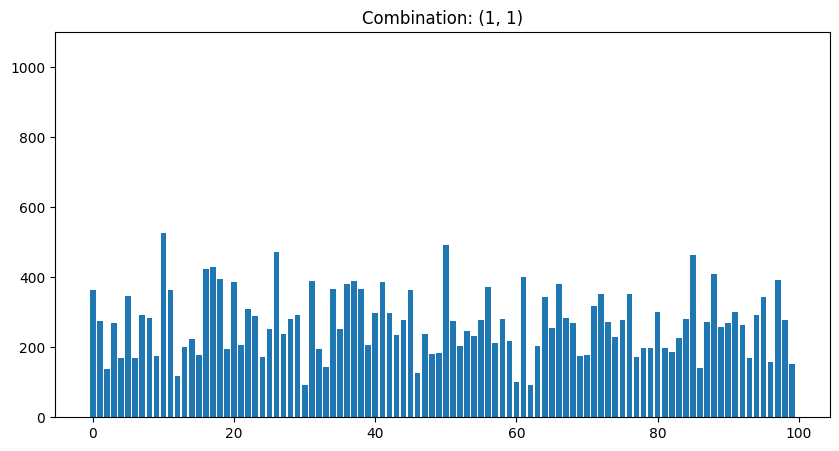

In [22]:
import numpy as np

# plot the distribution of each combination
for combination in combinations:
    current_node = []
    for node in counter_partition:
        current_node.append(node[combination])

    fig = plt.figure(figsize=(10, 5))
    plt.ylim(0, 1100)
    plt.bar(range(len(current_node)), current_node)
    plt.title(f"Combination: {combination}")
    print(f"Mean of combination {combination}: {sum(current_node) / len(current_node)}")
    print(f"Standard deviation of combination {combination}: {np.std(current_node)}")

Mean: 0.01
Standard deviation: 0.004814826681920483
Mean: 0.009999999999999998
Standard deviation: 0.004772230719208207
Mean: 0.010000000000000004
Standard deviation: 0.004383795362823083
Mean: 0.009999999999999998
Standard deviation: 0.004299593960602451


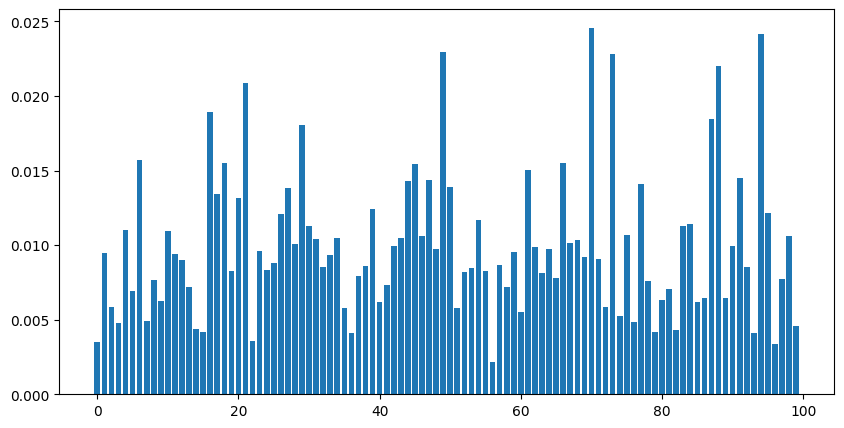

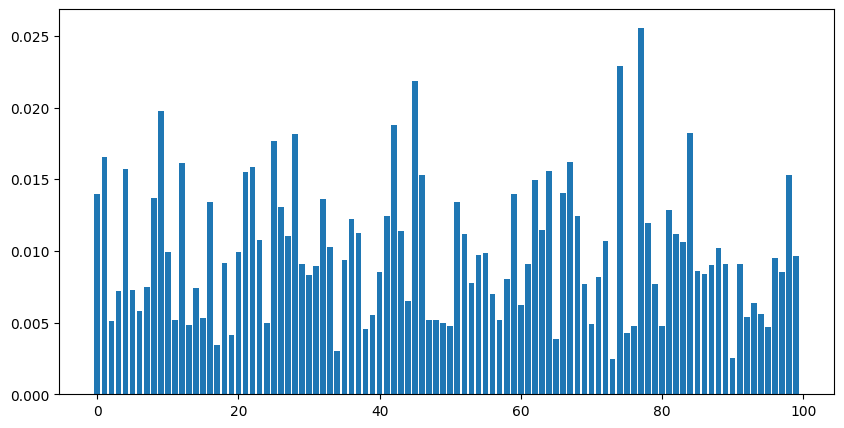

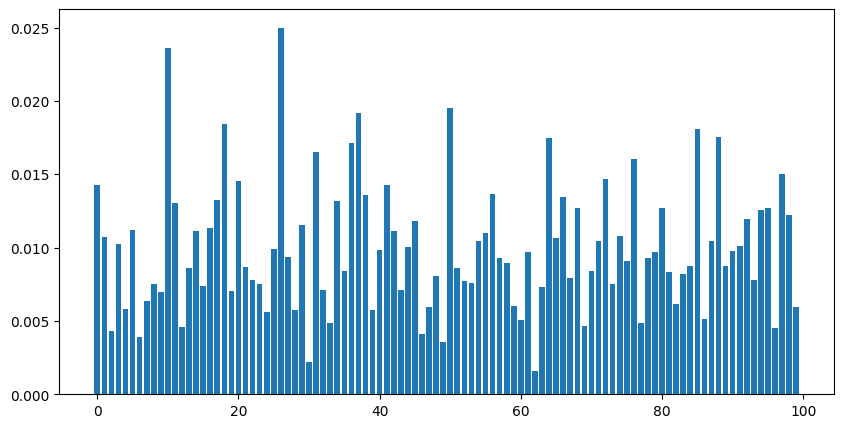

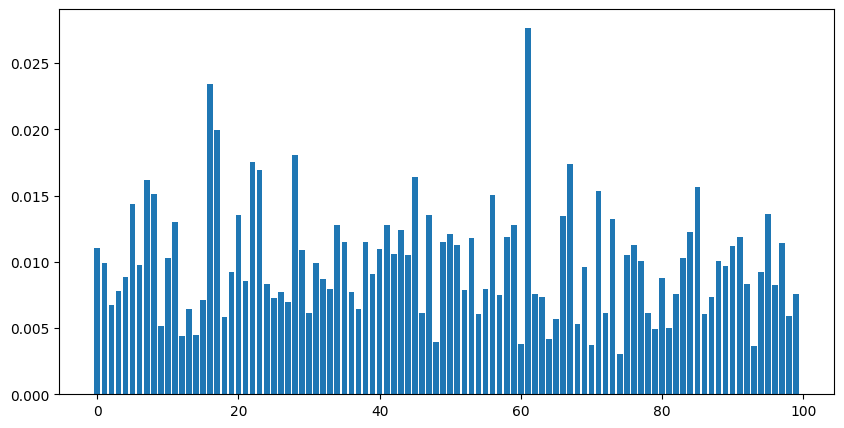

In [23]:
import numpy as np

# plot the distribution of each combination
for distribution in dir_distributions:
    fig = plt.figure(figsize=(10, 5))
    plt.bar(range(len(distribution[0])), distribution[0])
    # plt.title(f"Combination: {combination}")
    print(f"Mean: {sum(distribution[0]) / len(distribution[0])}")
    print(f"Standard deviation: {np.std(distribution[0])}")
